## This notebook shows how the field solver is tested.
### The Poisson system here simply translates to a 1D integral (please see the docs for more)
### Last modified July 1, 2020
### Authored by: AJ

In [1]:
import numpy as np
from tests import test_fieldsolver


if test_fieldsolver.test_field_solver() is None:
    print ("success!")

success!


### Let's go through this test step-by-step
#### First we initialize a grid

In [2]:
nx = 96
kx_pert = 0.25
xmax = 2 * np.pi / kx_pert
dx = xmax / nx
axis = np.linspace(dx / 2, xmax - dx / 2, nx)
kx = np.fft.fftfreq(axis.size, d=dx) * 2.0 * np.pi
one_over_kx = np.zeros_like(kx)
one_over_kx[1:] = 1.0 / kx[1:]

#### Then we initialize a few periodic charge densities and analytically derived electric fields which are solutions to those charge densities

In [3]:
charge_densities = [
        1.0 + np.sin(kx_pert * axis),
        1.0 + np.cos(2 * kx_pert * axis),
        1.0 + np.sin(2 * kx_pert * axis) + np.cos(8 * kx_pert * axis),
]

electric_fields = [
    np.cos(kx_pert * axis) / kx_pert,
    -np.sin(2 * kx_pert * axis) / 2.0 / kx_pert,
    np.cos(2 * kx_pert * axis) / 2.0 / kx_pert
    - np.sin(8 * kx_pert * axis) / 8.0 / kx_pert,
]

#### Then we loop through each pair and make sure that our implementation works! Note that we import the actual method that's used in the simulations here.

In [4]:
from vlapy.core import field
for actual_field, charge_density in zip(electric_fields, charge_densities):
    test_field = field.solve_for_field(
        charge_density=1.0 - charge_density, one_over_kx=one_over_kx
    )
    np.testing.assert_almost_equal(actual_field, test_field, decimal=4)

### Here's an example visualization of the test

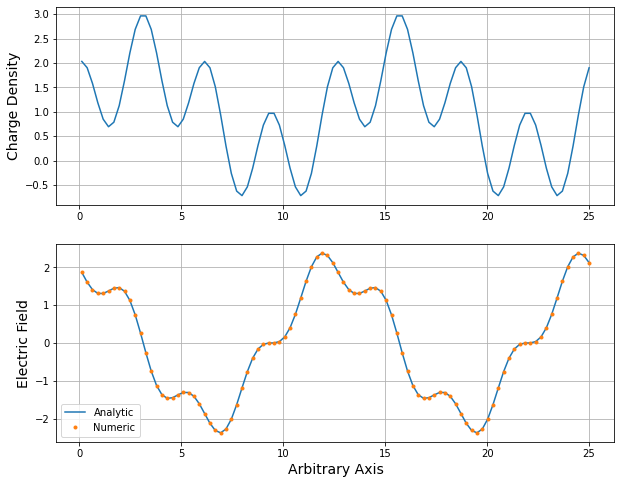

In [8]:
from matplotlib import pyplot as plt

field_fig = plt.figure(figsize=(10,8))
charge_density_plot = field_fig.add_subplot(211)
charge_density_plot.plot(axis, charge_densities[-1])
charge_density_plot.set_ylabel("Charge Density", fontsize=14)
charge_density_plot.grid()

field_plot = field_fig.add_subplot(212)
field_plot.plot(axis, electric_fields[-1], label="Analytic")
field_plot.plot(axis, test_field, ".", label="Numeric")
field_plot.set_xlabel("Arbitrary Axis", fontsize=14)
field_plot.set_ylabel("Electric Field", fontsize=14)
field_plot.grid()
field_plot.legend()